<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Fernanda Urrea, ROL: 201551522-0 </H3>
<H3 align='center'> Matías Gómez, ROL: 201460501-3 </H3>

<hr style="height:2px;border:none"/>

## 2. Análisis de audios como datos brutos

Distintos tipos de datos han sido tratados en el área de Machine Learning, donde el análisis de estos y
el manejo para poder dejarlos en una representación que se pueda entregar como entrada al algoritmo es
crucial. El manejo sobre los datos brutos se denomina pre-procesamiento y existen distintos dependiento del
tipo de datos y los distintos diminios de problemas, tales como imágenes, audios, texto.  
En esta actividad se trabajará con datos de audios los cuales son directamente extraı́dos desde datos fuentes
*.wav*, lo que corresponde a una señal de sonido en diferentes tiempos.

<img src="https://cdn.shopify.com/s/files/1/0977/4240/products/il_fullxfull.1054777221_nym4.jpg?v=1527718941" width="40%" />



El *dataset* se denomina **Heartbeat Sounds**[[3]](#refs) y es presentado en la plataforma Kaggle a través del siguiente  __[link](https://www.kaggle.com/kinguistics/heartbeat-sounds)__. Este dataset consta de grabaciones de sonidos de latidos cardı́acos normales y anormales, con distintas categorı́as para los latidos anormales. Para la tarea se trabajará con el *dataset A* presente en la data, el cual corresponde a datos generados desde la vı́a pública mediante la aplicación de Iphone iStethoscope Pro. El objetivo será el de clasificar cada sonido como latido cardı́aco normal o una de las las subcategorı́as de anormal (*Murmur, Extra Heart Sound, Artifact*), por lo que se trata de un problema de clasificación múltiple con 4 clases. Las distintas clasificaciones para los sonidos son explicadas en el sitio de Kaggle.

Para leer y trabajar los archivos de extensión *.wav* se utilizará el siguiente código:

In [1]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

#### a) Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay por clase.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('set_a.csv')
print(df.shape,"\n")
print(df.head(),"\n")

print(df['label'].value_counts())


(176, 4) 

  dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN 

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


Hay en total 124 registros de los cuales 40 corresponden a la clase artifact, 34 a murmur, 31 a normal y 19 a extra heart sound. Todos son archivos de audio .wav  
Cada registro contiene 4 campos, dataset, fname, label y sublabel; en los que se detalla el dataset al que pertenece el registro, el nombre del archivo, la etiqueta y la subetiqueta respectivamente.

#### b) Lea los archivos *.wav* y transformelos en secuencias de tiempo. Realice un *padding* de ceros al final de cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la importancia de realizar este paso.

In [11]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux

new_df = pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))

In [12]:
new_df['len_series'].describe()

count       176.000000
mean     354924.181818
std       68718.958442
min       41294.000000
25%      349958.000000
50%      385867.500000
75%      396900.000000
max      396900.000000
Name: len_series, dtype: float64

Se observa que a través de la función entregada y el padding de ceros realizados, la mayoria de los registros tienen el mismo largo.


####  c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [[4]](#refs), el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase. Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos? ¿Un solo dato puede afectar esto?

In [13]:
new_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] 
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]

In [14]:
print(new_df['target'].value_counts())


normal/extrahls    65
artifact           58
murmur             53
Name: target, dtype: int64


Del link en el que se presentan la etiquetas asignadas por el doctor experto, se extrae una matriz con la que se procede a reetiquetar la muestra.  
Ahora, hay 65 registros asociados a normal/extrahls, 58 a artifact y 53 a murmur.  
Si hay etiquetas mal asignadas a los datos entonces el learner asociara el sentimiento incorrecto a aquel dato de entrenamiento lo que luego repercutirá en el aprendizaje.   
Un solo dato entre millones puede que no afecte pero cuando el conjunto de aprendizaje para cada sentimiento no es tan grande entonces puede que si afecte.

#### d) Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos clasificadores.

In [18]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

print(new_df["target"].value_counts())


2    65
0    58
1    53
Name: target, dtype: int64


Se codifican las distintas clases a valores numéricos, de la siguiente forma:   
0 para artifact.  
1 para murmur.  
2 para normal/extrahls.  

#### e) Desordene los datos, evitando ası́ el orden en el que vienen la gran mayorı́a de las etiquetas. Cree la matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas? ¿De qué tipo?

In [20]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape
for i in range(len(X)):
    print(X[i])
    
print(len(X),len(X[0]))

[ 1.0000e+00 -1.0000e+00  0.0000e+00 ...  1.5777e+04  1.5098e+04
  1.3092e+04]
[-43. -47. -54. ...   0.   0.   0.]
[4933. 5293. 5569. ...    0.    0.    0.]
[ -5.  -5.   2. ... 445. 431. 425.]
[ 19664.  22367.  24463. ... -19325. -20104. -20444.]
[ 366.  359.  356. ... 1986. 1974. 1959.]
[14. 17. 14. ...  0.  0.  0.]
[-302. -323. -348. ...    0.    0.    0.]
[-8079. -8657. -9096. ...     0.     0.     0.]
[154. 146. 151. ...   0.   0.   0.]
[-183. -194. -207. ...    0.    0.    0.]
[ -92. -114. -102. ...    0.    0.    0.]
[  0.  -1.   2. ... 115.  88. 119.]
[-404. -442. -456. ...    0.    0.    0.]
[  -3.  -21.  -28. ... -164. -174. -182.]
[-1008. -1080. -1137. ...     0.     0.     0.]
[124. 147. 140. ... 181. 210. 208.]
[-2673.  -109.  2185. ...  -237.  -383.  -502.]
[-244. -248. -228. ...    0.    0.    0.]
[-7345. -7876. -8281. ...     0.     0.     0.]
[-2169. -2661. -1605. ...   435.   373.   417.]
[-25. -28. -26. ... -12. -17. -14.]
[220. 191. 171. ...   0.   0.   0.]
[-15546. 

El número de filas es mucho menor que el número de columnas, luego la matriz está bastante lejos de ser una matriz cuadrada.

#### f) Para pre-procesar la secuencia en el tiempo realice una transformada de fourier discreta [[5]](#refs) para pasar los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido. Visualice el cambio de representación


In [22]:
X_fourier = np.abs(np.fft.fft(X))


for i in range(len(X_fourier)):
    print(X_fourier[i])
print(len(X_fourier),len(X_fourier[0]))


[5175479.         3352971.59575897 1982681.89554694 ... 1008510.40222523
 1982681.89554694 3352971.59575897]
[1242225.          585127.95442239 1161087.55830193 ... 1292622.09651481
 1161087.55830193  585127.95442239]
[ 299341.         2510838.66708107 2009184.17789588 ...  535382.54135617
 2009184.17789588 2510838.66708107]
[193648.         187010.34491325 264341.54174313 ... 270924.99139442
 264341.54174313 187010.34491325]
[ 82290.         114316.95473452  27497.88538945 ... 215976.63239075
  27497.88538945 114316.95473452]
[1123580.          467715.34594816  958613.78278321 ...  763473.40313592
  958613.78278321  467715.34594816]
[374854.         390720.51857821 364402.80018929 ...  72816.3414425
 364402.80018929 390720.51857821]
[2674260.          580755.40986203 2116571.86762393 ...  518008.00625
 2116571.86762393  580755.40986203]
[ 973978.          602972.82939273 1453112.40386168 ... 2248831.98173676
 1453112.40386168  602972.82939273]
[714767.         349736.29706165 418033.8

Las dimensiones siguen siendo las mismas.

#### g) Para seguir con el pre-procesamiento realice un muestreo representativo de los datos a través de una técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podrı́a determinar si el muestro es representativo?

In [23]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

In [52]:


for i in range(len(X_resampled)):
    print(X_resampled[i])

print(len(X_resampled),len(X_resampled[0]))


[1372477.63777013 2022553.88684224 1353263.54699823 ...  850962.70276735
 1353263.54699822 2022553.88684224]
[234650.64589506 364185.32459602 255594.42231343 ... 222241.31470828
 255594.42231343 364185.32459602]
[845349.38704442 509335.58906628 462950.74638868 ... 409599.53240119
 462950.74638868 509335.58906628]
[1008848.89142765  377944.90525551  452506.1805523  ... 1084071.49760056
  452506.1805523   377944.90525551]
[356171.21416046 596970.61347505  65031.79748664 ... 640008.94923955
  65031.79748664 596970.61347505]
[282722.36613412 169865.51004698 247757.69172022 ... 247514.08367234
 247757.69172022 169865.51004698]
[266715.3266613  328357.48818211 241375.91811844 ... 316222.54108455
 241375.91811844 328357.48818211]
[381408.00435221 436490.97661851 812871.96421672 ... 628867.07333048
 812871.96421672 436490.97661851]
[279336.34706033 237023.66519568 395058.75035922 ... 434447.530318
 395058.75035922 237023.66519568]
[485076.9066756  484560.34164441 427555.42287293 ... 395240.058

scipy.signal.resample cambia los puntos de las ondas a una cantidad dada, en esta caso 100.000, usando el hecho de que las ondas son periódicas lo que está garantizado pues la transformada de Fourier entrega una señal periodica.  
Ahora cada ejemplo, con menos puntos, condensa la misma información, esto es bueno dado que se reduce la extensión de cada onda para trabajar y no se pierde información.

#### h) Debido a que no hay conjunto de pruebas, y que es necesario para evaluar la calidad **final** del modelo, genérelo a través de la técnica *hold-out*

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(132, 100000)
(44, 100000)
(132,)
(44,)


#### i) Realice un proceso de estándarizar los datos para ser trabajados adecuadamente. Recuerde que solo se debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.

In [27]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [28]:
for i in range(len(X_train)):
    print(X_train[i])

[-0.40291179 -0.29447786 -0.41056628 ... -0.46410349 -0.41056628
 -0.29447786]
[ 1.42056853  0.53020811  1.37189989 ... -0.00665916  1.37189989
  0.53020811]
[-0.25584403 -0.27880135 -0.53708283 ... -0.35782472 -0.53708283
 -0.27880135]
[-0.60698867 -0.6877121  -0.73096111 ... -0.60602904 -0.73096111
 -0.6877121 ]
[ 0.2908628   0.05521776 -0.23949961 ... -0.06212964 -0.23949961
  0.05521776]
[-0.61730989 -0.6976522  -0.68963656 ... -0.42282882 -0.68963656
 -0.6976522 ]
[-0.75519769 -0.11342489 -0.84208054 ...  0.02257771 -0.84208054
 -0.11342489]
[-0.51749372  0.05506017 -0.79256516 ... -0.01366966 -0.79256516
  0.05506017]
[-0.0315493  -0.08641554 -0.3827651  ... -0.30674576 -0.3827651
 -0.08641554]
[ 0.02335963  0.99511531 -0.21913549 ... -0.03873361 -0.21913549
  0.99511531]
[ 0.13086938 -0.29852925 -0.39352152 ...  0.55116889 -0.39352152
 -0.29852925]
[-0.59382066 -0.52602884 -0.45268422 ... -0.27513961 -0.45268422
 -0.52602884]
[-0.68784255 -0.62232211 -0.74392536 ... -0.63284647 

#### j) Realice una reducción de dimensionalidad a través de la técnica **PCA**, para representar los datos en $d = 2$ dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.

In [29]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

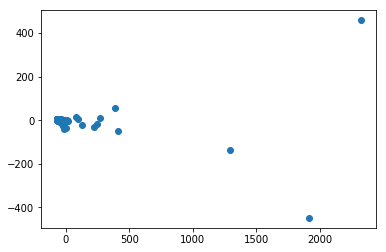

In [31]:
import matplotlib.pyplot as plt
x_x=[]
y_y=[]
for i in range(len(X_pca_train)):
    x_x.append(X_pca_train[i][0])
    y_y.append(X_pca_train[i][1])
plt.scatter(x_x,y_y)



####  k) Entrene un modelo de Regresión Logı́stica variando el parámetro de regularización $C$ construyendo un gráfico resumen del error en función de este hiper-parámetro. Además entrene un Perceptrón, variando el hiper-parámetro de regularización $\alpha$ en el rango inverso que para la Regresión Logı́stica ¿Por qué? Contruya el mismo gráfico resumen, en función de $C$ o $\alpha$. Compare y comente lo observado.

In [ ]:
import matplotlib.pyplot as plt


Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = [1/c for c in Cs]
from sklearn.linear_model import Perceptron,LogisticRegression
for c in Cs:
    model1 = LogisticRegression(penalty='l2', C=c,max_iter=200)
    model1.fit(X_train,y_train)

    
for a in alphas:
    model2 = Perceptron(penalty='l2', alpha=a, max_iter=200)
    


#### l) Genere otra representación de los datos a través de la técnica de reducción de dimensionalidad **ICA**, con dimensionalidad $d = 2$. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un *warning* explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones. Vuelva a realizar el item k) pero para esta nueva representación.

In [ ]:
from sklearn.decomposition import FastICA
ica_model = FastICA(n_components=d)
ica_model.fit(X_train)
X_ica_train = ica_model.transform(X_train)
X_ica_test = ica_model.transform(X_test)

#### m) Experimente con diferentes dimensiones $d$ para la proyección de PCA e ICA con el propósito de obtener un modelo con menor error. Construya una tabla o gráfico resumen de los errores o *accuracy*, comente.

#### n) Realice otra reducción de dimensionalidad ahora a través de la técnica **LDA**, para representar los datos en $d = 2$ dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un *warning* explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones.

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_model = LDA(n_components=2)
lda_model.fit(X_train,y_train)
X_lda_train = lda_model.transform(X_train)
X_lda_test = lda_model.transform(X_test)

NameError: name 'X_train' is not defined

#### o) Con el propósito de encontrar el mejor modelo vuelva a realizar el item k) en el nuevo espacio generado por la representación según las $d$ dimensiones de la proyección LDA. Esta nueva representación ¿mejora o empeora el desempeño? Explique.

####  p) Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias cracterı́sticas (*feature crafting*) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros trabajos [[6]](#refs), [[7]](#refs)  si desea.

## Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] Ethem Alpaydin. *Machine Learning*. 2014.  
[3] Bentley, P. and Nordehn, G. and Coimbra, M. and Mannor (2011) , Classifying Heart Sounds Challenge,
CHSC2011, http://www.peterjbentley.com/heartchallenge/index.html  
[4] https://www.kaggle.com/toregil/new-labels-for-set-a  
[5] https://en.wikipedia.org/wiki/Fourier transform  
[6] https://www.kaggle.com/primaryobjects/voicegender/data  
[7] Gamit, M. R., Dhameliya, P. K., & Bhatt, N. S. (2015). Classification Techniques for Speech Recognition:
A Review. vol, 5, 58-63.  
[8] www.figure-eight.com/  
[9] https://machinelearningmastery.com/develop-word-embeddings-python-gensim/, https://radimrehurek.com/gensim/models/word2vec.html or https://nathanrooy.github.io/posts/2018-03-22/word2vec-from-scratch-with-python-and-numpy/  
[10] https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-6-doc2vec-603f11832504